
# Delaunay Triangulations in Fundamental Language (FL) Research

## Introduction
In this notebook, we focus on Delaunay triangulations and their connection to Voronoi diagrams in the context of FL research.

## Computing Delaunay Triangulations
We will demonstrate the computation of Delaunay triangulations using Python libraries and discuss their properties.

## Application in FL
Exploring the role of Delaunay triangulations in FL research and how they contribute to the understanding of various phenomena.


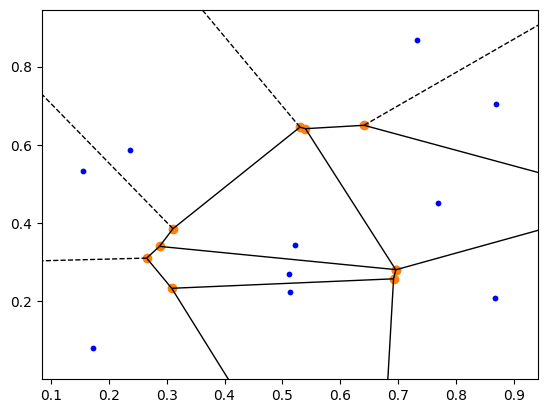

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d

# Generate 10 random points
points = np.random.rand(10, 2)

# Compute Voronoi tesselation
vor = Voronoi(points)

# Plot
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax)

# Highlight the points
ax.plot(points[:,0], points[:,1], 'b.')

plt.show()

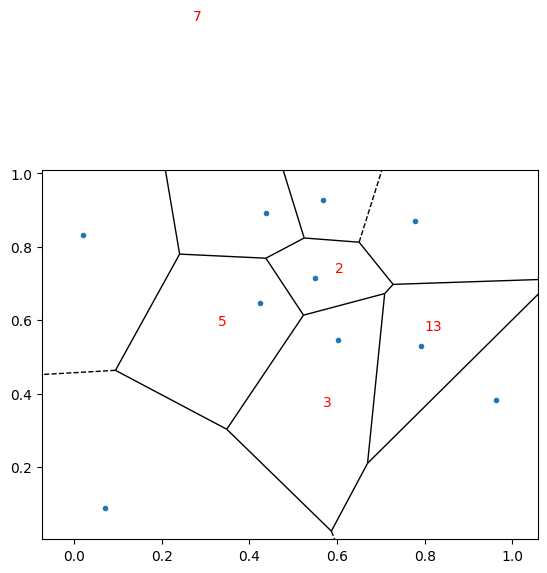

In [4]:
# Here is the Python code that generates a Voronoi diagram and assigns a unique prime number to each cell:

import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial
import sympy

# Function to generate n unique prime numbers
def generate_primes(n):
    primes = []
    num = 2
    while len(primes) < n:
        if sympy.isprime(num):
            primes.append(num)
        num += 1
    return primes

# Generate random points
np.random.seed(0)  # For reproducibility
points = np.random.rand(10, 2)  # 10 random points in 2D

# Create Voronoi diagram
vor = scipy.spatial.Voronoi(points)

# Generate prime numbers for each cell
num_cells = len(vor.point_region)
primes = generate_primes(num_cells)

# Plot Voronoi diagram
fig, ax = plt.subplots()
scipy.spatial.voronoi_plot_2d(vor, ax=ax, show_vertices=False)

# Annotate each cell with a prime number
for region_index, prime in zip(vor.point_region, primes):
    region = vor.regions[region_index]
    if -1 not in region:  # Skip cells that are not closed
        polygon = [vor.vertices[i] for i in region]
        centroid = np.mean(polygon, axis=0)
        ax.text(centroid[0], centroid[1], str(prime), color='red')

plt.show()


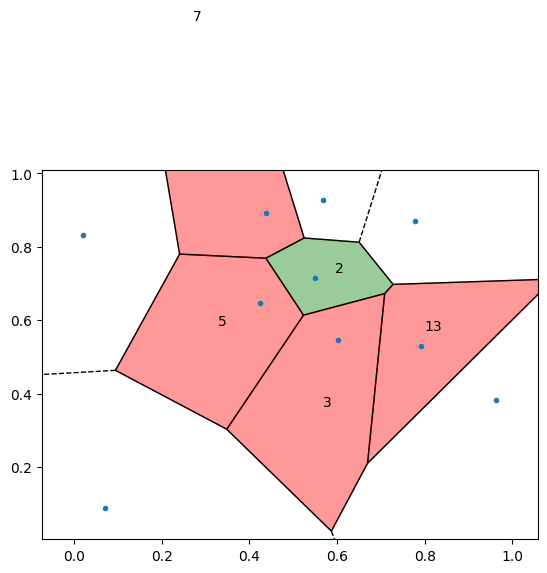

In [5]:
def find_adjacent_cells(vor, central_point_index):
    adjacent_cells = set()
    for point_pair in vor.ridge_points:
        if central_point_index in point_pair:
            adjacent_cells.add(point_pair[0] if point_pair[1] == central_point_index else point_pair[1])
    return adjacent_cells

# Find the index of the cell with prime number 2
central_cell_index = primes.index(2)

# Find adjacent cells to the central cell
adjacent_cells_indices = find_adjacent_cells(vor, central_cell_index)

# Plot Voronoi diagram with the ring highlighted
fig, ax = plt.subplots()
scipy.spatial.voronoi_plot_2d(vor, ax=ax, show_vertices=False)

# Highlight the central cell and its adjacent cells
for region_index in range(len(vor.point_region)):
    region = vor.regions[vor.point_region[region_index]]
    if -1 not in region:  # Skip cells that are not closed
        polygon = [vor.vertices[i] for i in region]
        centroid = np.mean(polygon, axis=0)
        color = 'green' if region_index == central_cell_index else 'red' if region_index in adjacent_cells_indices else 'blue'
        ax.fill(*zip(*polygon), alpha=0.4, color=color)
        ax.text(centroid[0], centroid[1], str(primes[region_index]), color='black')

plt.show()
